In [9]:
import numpy as np
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import dicom
import subprocess

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/rogertrullo/my_venv/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
def partitioned_var(list_stds,list_elts):
    stds=[]
    for i in xrange(0,len(list_stds)):
        stds.append(list_elts[i]*list_stds[i])
    return np.sum(stds)/np.sum(list_elts)

def partitioned_mean(list_means,list_elts):
    means=[]
    for i in xrange(0,len(list_stds)):
        means.append(list_elts[i]*list_means[i])
    return np.sum(means)/np.sum(list_elts)

In [26]:
def combine_organs_GT(list_name_organs):
    #list of sitk images
    list_images=[]
    for fname in list_name_organs:
        list_images.append(sitk.ReadImage(fname))
    
    size=list_images[0].GetSize()
    output_image = sitk.Image(size,sitk.sitkUInt8)
    
    list_np=[]
    for img in list_images:
        list_np.append(sitk.GetArrayFromImage(img))
    cnt=1
    output_np=np.zeros_like(list_np[0])
    for img in list_np:
        #print img.shape
        output_np[np.where(img==1)]=cnt
        cnt+=1
    
    print np.unique(output_np)
    output_image=sitk.GetImageFromArray(output_np)
    output_image.CopyInformation(list_images[0])
    return output_image
        
        
        
                       
    

In [46]:
plastimatch_path='./Users/rogertrullo/Documents/Plastimatch/plastimatchbin/plastimatch'
dirpatients='./DOI/'
output_dir='/Users/rogertrullo/Documents/Lung_CT_challenge'
path, dirs, files = os.walk(dirpatients).next()#every folder is a patient
n_total_voxels=0
list_means=[]
list_stds=[]
list_elts=[]
list_imgs=[]

list_name_organs=['SpinalCord.mha', 'Esophagus.mha', 'Lung_L.mha', 'Heart.mha', 'Lung_R.mha']

if not os.path.exists(output_dir):
        os.mkdir(output_dir)


for d in dirs:
    print d
    path_, dirs_, files_ = os.walk(os.path.join(path,d)).next()#every folder is a patient
    _,dirs_final,_=os.walk(os.path.join(path,d,dirs_[0])).next()#every folder is a patient
    path_1=os.path.join(path,d,dirs_[0],dirs_final[1])
    path_2=os.path.join(path,d,dirs_[0],dirs_final[0])
    nfiles1=os.listdir(path_1)
    nfiles2=os.listdir(path_2)
    if len(nfiles1)>1:
        path_ct=path_1
        path_gt=path_2
    else:
        path_ct=path_2
        path_gt=path_1
        
    reader = sitk.ImageSeriesReader()
    #print path_ct
    reader.GetGDCMSeriesFileNames(path_ct)
    dicom_names = reader.GetGDCMSeriesFileNames( path_ct )
    #print dicom_names
    reader.SetFileNames(dicom_names)
    image = reader.Execute() 
    image_np=sitk.GetArrayFromImage(image)
    size = image.GetSize()
    print( "Image size:", size[0], size[1], size[2])
    list_means.append(np.mean(image_np))
    list_stds.append(np.std(image_np))
    list_elts.append(np.prod(size))
    #list_imgs.extend(image_np.ravel())
    #use plastimatch to convert RT-Dicom to image
    #path_rt=os.path.join(path_gt,os.listdir(path_gt)[0])   
    
    #cmd='plastimatch convert --input {0} --output-type=uchar --referenced-ct {1} --output-prefix {2}'.format(path_rt,path_ct,'./')
    #print subprocess.check_output(cmd, shell=True)
    #output_itk=combine_organs_GT(list_name_organs)
    
    #out_folder=os.path.join(output_dir,d)
    #if not os.path.exists(out_folder):
    #    os.mkdir(out_folder)
    #sitk.WriteImage(image,os.path.join(out_folder,'{}.nii.gz'.format(d)))
    #sitk.WriteImage(output_itk,os.path.join(out_folder,'GT.nii.gz'))
    print d,'finished'

print 'everything done'
print 'partitioned mean',partitioned_mean(list_means,list_elts)
print 'partitioned std',partitioned_var(list_stds,list_elts)

#print 'real mean',np.mean(list_imgs),'partitioned mean',partitioned_mean(list_means,list_elts)
#print 'real std',np.std(list_imgs),'partitioned std',partitioned_var(list_stds,list_elts)
    

LCTSC-Train-S1-001
('Image size:', 512, 512, 140)
LCTSC-Train-S1-001 finished
LCTSC-Train-S1-002
('Image size:', 512, 512, 161)
LCTSC-Train-S1-002 finished
LCTSC-Train-S1-003
('Image size:', 512, 512, 154)
LCTSC-Train-S1-003 finished
LCTSC-Train-S1-004
('Image size:', 512, 512, 158)
LCTSC-Train-S1-004 finished
LCTSC-Train-S1-005
('Image size:', 512, 512, 136)
LCTSC-Train-S1-005 finished
LCTSC-Train-S1-006
('Image size:', 512, 512, 140)
LCTSC-Train-S1-006 finished
LCTSC-Train-S1-007
('Image size:', 512, 512, 148)
LCTSC-Train-S1-007 finished
LCTSC-Train-S1-008
('Image size:', 512, 512, 134)
LCTSC-Train-S1-008 finished
LCTSC-Train-S1-009
('Image size:', 512, 512, 150)
LCTSC-Train-S1-009 finished
LCTSC-Train-S1-010
('Image size:', 512, 512, 122)
LCTSC-Train-S1-010 finished
LCTSC-Train-S1-011
('Image size:', 512, 512, 162)
LCTSC-Train-S1-011 finished
LCTSC-Train-S1-012
('Image size:', 512, 512, 131)
LCTSC-Train-S1-012 finished
LCTSC-Train-S2-001
('Image size:', 512, 512, 160)
LCTSC-Train-S2

## We plot now one slice of the 3d volume

int32 (214, 512, 512) -1000 3071


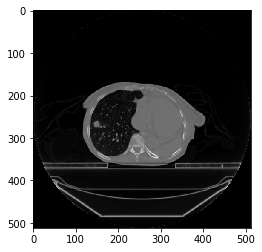

In [81]:
ctnp=sitk.GetArrayFromImage(image)
print ctnp.dtype,ctnp.shape,np.min(ctnp),np.max(ctnp)
slice_ct=ctnp[80,:,:]
plt.imshow(slice_ct,cmap='gray')

### We can see that the values vary between -1000 and 3071, they are integers representing HU units (https://en.wikipedia.org/wiki/Hounsfield_scale)

#### We now plot a histogram to see the distribution of intensities


(array([  4.70162360e+07,   1.60399000e+06,   6.85027100e+06,
          5.64637000e+05,   5.53230000e+04,   7.81600000e+03,
          2.72000000e+02,   5.10000000e+01,   3.80000000e+01,
          1.82000000e+02]),
 array([-1000. ,  -592.9,  -185.8,   221.3,   628.4,  1035.5,  1442.6,
         1849.7,  2256.8,  2663.9,  3071. ]),
 <a list of 10 Patch objects>)

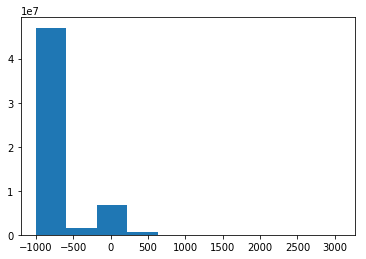

In [14]:
plt.hist(ctnp.ravel())

In [134]:
gt_itk=sitk.ReadImage('../GT_13.nii.gz')
gtnp=sitk.GetArrayFromImage(gt_itk)
print np.unique(gtnp)

[0 1 2 3 4 5]


#### We can see that the majority of voxels are 'air' voxels with dark intensity (-1000)

## We now have to deal with the ground-truth which is in Dicom-RT format
### We need to convert this format to an image containing the label for every voxel
#### I could not find a library to do this, and probably I will have to code it myself; for now I was able to read the format where we can read the name of the organs, and the x,y,z voxels of the contour. We would need to transform this physical coordinates into image coordinates and assign the proper label

In [128]:
print path_gt
print path_ct
print os.listdir(path_gt)[0]
ds=dicom.read_file(os.path.join(path_gt,os.listdir(path_gt)[0]))


./DOI/LCTSC-Train-S3-012/1.3.6.1.4.1.14519.5.2.1.7014.4598.241302417772680614574081426270/1.3.6.1.4.1.14519.5.2.1.7014.4598.278528516827875270055530886523
./DOI/LCTSC-Train-S3-012/1.3.6.1.4.1.14519.5.2.1.7014.4598.241302417772680614574081426270/1.3.6.1.4.1.14519.5.2.1.7014.4598.306855928738612353709729964131
000000.dcm


In [129]:
rs= ds.StructureSetROISequence
for i in rs:
    print i.ROIName

Esophagus
Heart
Lung_L
Lung_R
SpinalCord


In [42]:
contour_esophagus=ds.ROIContourSequence[0]
for k in contour_esophagus.keys():
    print contour_esophagus[k]

(3006, 0040) Contour Sequence                    SQ: <Sequence, length 159, at 1081C6E68>
(3006, 002a) ROI Display Color                   IS: ['255', '114', '0']
(3006, 0084) Referenced ROI Number               IS: '1'


## Using Plastimatch we were able to convert the Dicom-Rt structure into a segmentation image
![alt text][logo1]
![alt text][logo2]
![alt text][logo3]
![alt text][logo]


[logo1]: GT1.png "Logo Title Text 2"
[logo2]: GT2.png "Logo Title Text 2"
[logo3]: GT3.png "Logo Title Text 2"
[logo]: GT.png "Logo Title Text 2"